In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

c:\Users\Morgan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
cars_df = pd.read_csv('../data/cars.csv')
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
cars_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [34]:
test = cars_df[['mpg', 'origin']]

test.head()

,mpg,origin
0,18.0,America
1,15.0,America
2,18.0,America
3,16.0,America
4,17.0,America


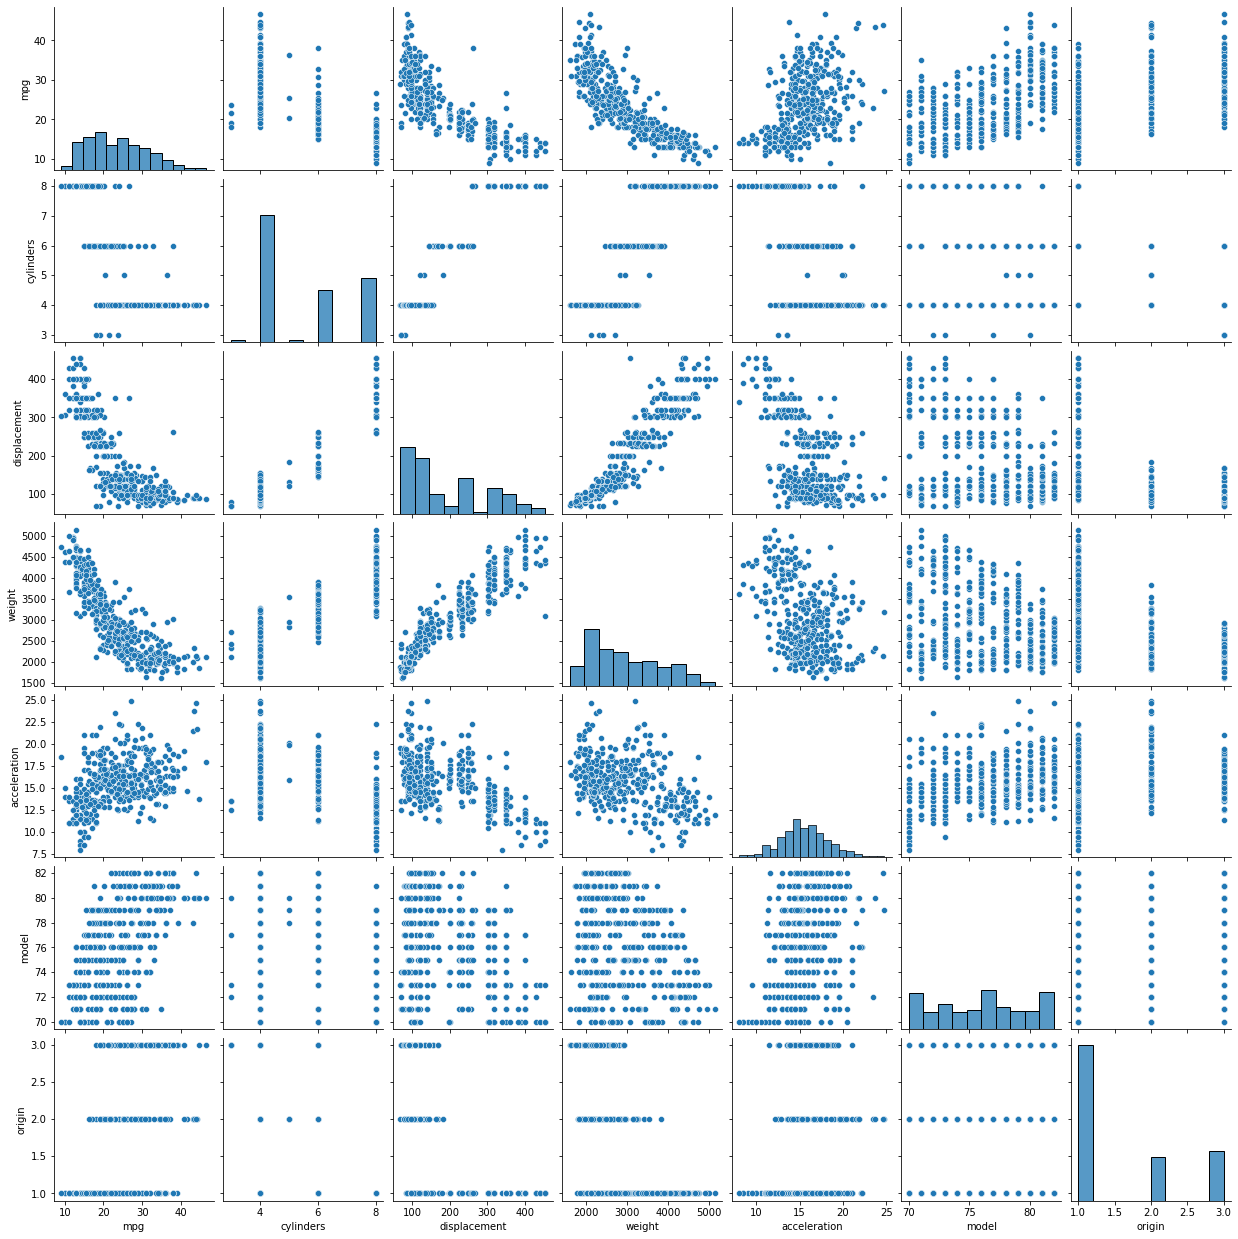

In [6]:
sns.pairplot(cars_df)

In [ ]:
# As horsepower increases weight decreases (separate by class)
# As horsepower increases mpg decreases
# Cars with origin 1 have more cars with more cylinders compared to other cars from other origins
# More vehicles from origin 1 have lower acceleratione time 
# Other origins have just as many or more vehicles that have low acceleration time
# Cars with origin 1 have lower mpg compared to cars from other origins 
#   H0: Vehicles from origin 1,2,3 that have 4 cylinders have means that are equal to each other.
#   H1: Vehicles from origin 1 that have 4 cylinders have a mean Higher than the mean with vehicles from other origins(vehicles with 4 cylinders)

In [8]:
cars_df['origin'].mask(cars_df['origin'] == 1, 'America',inplace=True)
cars_df['origin'].mask(cars_df['origin'] == 2, 'Germany',inplace=True)
cars_df['origin'].mask(cars_df['origin'] == 3, 'Japan',inplace=True)
cars_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,America,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,ford torino


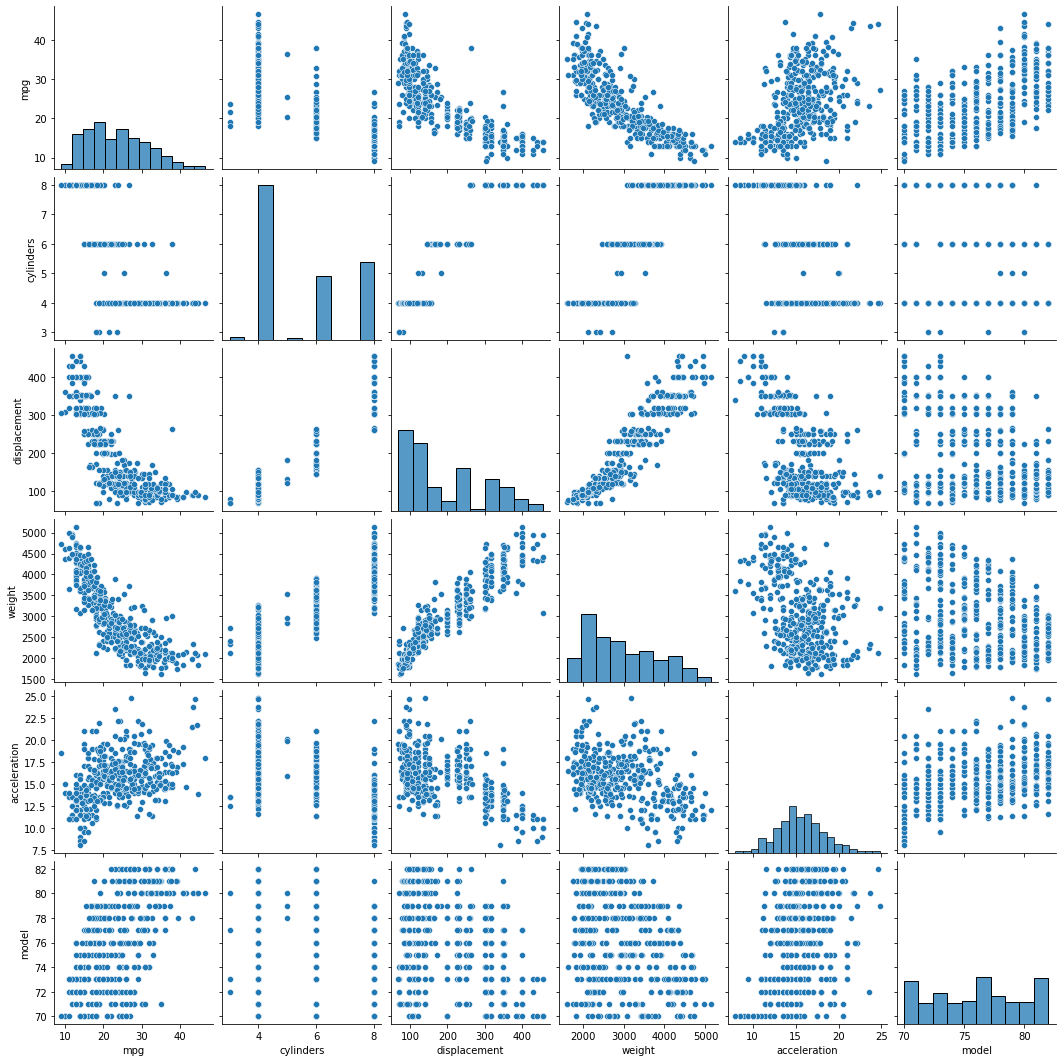

In [9]:
sns.pairplot(cars_df)

In [11]:
mpg_cylinder_origin = cars_df[['origin', 'cylinders', 'mpg']]
mpg_cylinder_origin.head(5)

,origin,cylinders,mpg
0,America,8,18.0
1,America,8,15.0
2,America,8,18.0
3,America,8,16.0
4,America,8,17.0


In [36]:
america = mpg_cylinder_origin.loc[mpg_cylinder_origin['origin'] == 'America', mpg_cylinder_origin['cylinders'] == '4']

america.head()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [25]:
germany = mpg_cylinder_origin.loc[mpg_cylinder_origin['origin'] == 'Germany']
germany = germany.loc[germany['cylinders'] == '4']

In [26]:
japan = mpg_cylinder_origin.loc[mpg_cylinder_origin['origin'] == 'Japan']
japan = japan.loc[japan['cylinders'] == '4']

In [33]:
america['mpg'].count()

0

In [29]:
import scipy.stats as stats

stats.ttest_ind(america['mpg'], japan['mpg'], nan_policy= 'omit', alternative='two-sided')

Ttest_indResult(statistic=nan, pvalue=nan)